Q1.1 Create your myknn_regressor.

A1.1 先引入函式庫，用以讀檔、計算，再設定 myknn_regressor 中會用到的函式和參數，並進行條件篩選，如是否移除離群值。
程式碼與註解如下：

In [3]:
#引入函式庫
import pandas as pd
import numpy as np
from numpy import * 
from math import sqrt


In [52]:
# 建構 myknn_regressor 
class myknn_regressor():
    def __init__(self,k,function): # k值,設定是否移除離群值
        self.k = k
        self.function = function
        if k < 10 : 
            self.function = False # 如果 k < 10，則設定不能移除
    
    def fit(self,x_train,y_train): # 引入訓練資料集
        self.x_train = x_train
        self.y_train = y_train
        return self
                
    def predict(self,x_test):  # 預測主函式
        self.x = x_test
        total_dist=[]
        for i in range(len(self.x)):      # 將測試資料中的每個點以歐幾里德距離計算，並存到總距離的list中
            dist = [sqrt(sum((self.x[i] - self.x_train[j])** 2)) for j in range(len(self.x_train))]
            total_dist.append(dist)
        near = np.argsort(total_dist) # 對於每個測試點與訓練資料集中的資料點，以近到遠的距離做排序
        k_neighbors = [self.y_train[i][:self.k] for i in near] # 從上面的排序中，挑出 k個最相鄰的點
        k_neighbors = np.array(k_neighbors) 
        
        if self.function == 'remove_outliers': # 設定移除離群值
            Y_predict = [ ]
            for n in range(len(k_neighbors)): # 對 k個鄰居做離群值辨識，以題目要求的1.5四分位距計算
                Q = np.percentile(k_neighbors[n],(25,75)) 
                Q1,Q3 = (Q[0],Q[1])
                IQR = Q3-Q1
                Min = Q1 - 1.5*IQR
                Max = Q3 + 1.5*IQR
                check = [True if i >= Min and i <= Max else False for i in k_neighbors[n]] # 如果有離群值，標記為False
                k = check.count(True) # 計算剩下多少個標準值，以便取平均
                predict = k_neighbors[n][check].sum()/k # 剔除離群值並計算k個鄰居的平均，經助教解釋，先保留小數點做RMSE的計算
                Y_predict.append(predict)
            Y_predict = np.array(Y_predict) # 轉化成陣列形式輸出
        else: # 如果沒有設定移除離群值的計算
            Y_predict = k_neighbors.sum(axis=1)/self.k 
            Y_predict = np.array(Y_predict)                            
        return Y_predict


Q1.2 Load data from msd_data1.pickle. You should standardized all feature values so that all features have a zero mean and a unit variance before training a KNN model. Make predictions using  𝑘=20 and "equal_weight" 𝑓. List the RMSE and the first 20 predictions in the testing data.


A1.2 使用 myknn_regressor 測試當 k = 20 且 權重相等時的預測。首先用pandas讀取檔案，再定義標準化函數，還有檢視RMSE

In [71]:
#將資料讀取並進行標準化
df = pd.read_pickle('msd_data1.pickle')
X_train = df['X_train']
Y_train = df['Y_train']
X_test = df['X_test']
Y_test = df['Y_test']

#為了標準化 X_train 還有 X_test，使用 X_train的平均和標準差進行標準化

mu = np.mean(X_train,axis = 0)
std = np.std(X_train,axis = 0)
X_train = (X_train-mu)/std

X_test = (X_test-mu)/std


#定義 RMSE
def RMSE(ypred,y_test):
    rmse = sqrt(sum((ypred - y_test)**2)/len(ypred))
    return rmse

#計算預測準確度
def precision(ypred):
    count = 0 
    for i in range(len(ypred)):
        if ypred[i] == Y_test[i]:
            count += 1
    return count/len(ypred)        

In [79]:
# 套用模型進行預測
myknn = myknn_regressor(20,'equal_weight')
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)

In [80]:
# 計算 未經四捨五入年份的RMSE
RMSE(ypred,Y_test)

10.25126451549596

In [81]:
# 列出前20個預測結果，在這邊才四捨五入
ypred  = around(ypred[:20])
ypred

array([1993., 1994., 2001., 1992., 1993., 1998., 1988., 1992., 2002.,
       2003., 2000., 1999., 1996., 1997., 1995., 1997., 1992., 2000.,
       2003., 1996.])

In [82]:
#看準確度
precision(ypred)


0.05

Q1.3 Load data from msd_data1.pickle. Standardized all feature values so that all features have a zero mean and unit variance. Make predictions using  k=20 and "remove_outier" 𝑓. List the RMSE and the first 20 predictions in the testing data.

A1.3 同上題，但加入移除離群值條件

In [83]:
# 套用模型移除離群值進行預測
myknn = myknn_regressor(20, "remove_outliers")
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)

In [84]:
# 記算 RMSE
RMSE(ypred,Y_test)

10.212572466080376

In [85]:
# 列出前20個預測結果
ypred  = around(ypred[:20])
ypred

array([1993., 1994., 2001., 1993., 1993., 2000., 1988., 1992., 2002.,
       2004., 2000., 2001., 1996., 1997., 1999., 1997., 1992., 2004.,
       2003., 1996.])

In [86]:
#看準確度
precision(ypred)

0.05

Q1 結果觀察：測試準確度不高，落在5%。移除離群值後，些微降低了RMSE值。以sklearn測試結果的值和myknn模型中的equal_weight結果一模一樣，而用remove_outliers之後的RMSE表現更好。


Q2.
We are going to explore the issue of hyper-parameter tuning in this question. We are going to consider three cases in this question. Use the knn regressor from sklearn.neighbors.KNeighborsRegressor for the first two cases, and your own myknn_regressor for the third cases.

For each case, use the data from msd_data1.pickle to train and test the KNN models. Compute the RMSE on the testing dataset using  𝑘=1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200. 

In the first case, all feature values are standardize to have unit variances and zero means. As for the second case, do not apply feature scaling. The third case use standardized feature and adopted myknn_regressor with "remove_outlier"  𝑓 to make prediction.

For each case, plot a curve that shows the relations between  𝑘 (x-axis) and RMSE (y-axis). If possible, plot the three curves in the same figure so that we can visually inspect their dynamics. Discuss your observations.

In [90]:
# 引入scikit learn 的 knn regressor
# 引入視覺化模組
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt


為了比較3個case的差異，先計算每個case的RMSE值之後存下，再繪至圖上

In [88]:
# 定義函數供 sklearn 呼叫計算 RMSE
def k_rmse(X_train,Y_train,X_test,Y_test):
    rmse = []
    k = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]
    for i in k:
        case = KNeighborsRegressor(i)   
        case.fit(X_train,Y_train)
        case_y_predict = case.predict(X_test)       
        rmse.append(RMSE(around(case_y_predict),Y_test))
    return rmse


In [95]:
# case1 
case1 = k_rmse(X_train,Y_train,X_test,Y_test)


In [96]:
# 要求為未經標準化數據，再次引入原始資料集
X_train_2 = df['X_train']
X_test_2 = df['X_test']
# case2
case2 = k_rmse(X_train_2,Y_train,X_test_2,Y_test)

In [97]:
# 使用 myknn_regressor（非常沒效率，跑了快40分鐘）
k = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]
rmse = []
for i in k:    
    myknn = myknn_regressor(i,'remove_outliers')
    myknn.fit(X_train, Y_train)
    ypred = myknn.predict(X_test)
    rmse.append(RMSE(ypred,Y_test))
case3 = rmse    
    
    

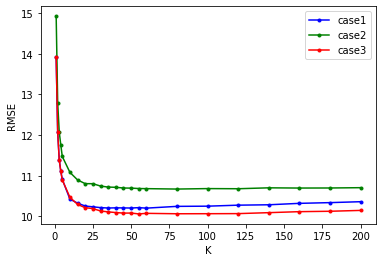

In [98]:
# 繪圖比較3個case 
fig,ax = plt.subplots()
ax.set_xlabel('K')
ax.set_ylabel('RMSE')
ax.plot(k,case1,'b.-',label = 'case1')
ax.plot(k,case2,'g.-',label = 'case2')
ax.plot(k,case3,'r.-',label = 'case3')
ax.legend()

由此題可以觀察出：
1.sklearn模型在當K值小於20之前，表現跟myknn的移除outliers不相上下，甚至有較優的情況；然而在K值大於25之後，可以明顯看出myknn的RMSE下降的數值優於sklearn，但明顯幅度減少許多；移除outliers的myknn模型，k值在55時RMSE達到最小，而在k >55之後可以看出RMSE有提升。
2.用sklearn跑的數據，遠比暴力法來的有效率，但RMSE值較大，準確度也較myknn模型低，足見移除離群值的方法相當有效。
3.sklearn模型K值在大於60以後，RMSE值有些微攀升，因此k的選擇不該過大。